# Analyze file summary_optuna

**Motivation:** Having file summary_optuna with all optuna reuslts, this file aims to analyze all these results (in terms of box plots)

### loads

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# local
import set_path
import supp.support_load as ls
from supp.support_save import save_df

In [60]:
summary_optuna_v1 = ls.read_excel('summary_optuna_v1_mod')['optuna_results']
summary_optuna_v2 = ls.read_excel('summary_optuna_v2_mod')['optuna_results']

# drop models that reached max epoch
max_epoch = 1000
summary_optuna_v1 = summary_optuna_v1[summary_optuna_v1['epoch']!=max_epoch]
summary_optuna_v2 = summary_optuna_v2[summary_optuna_v2['epoch']!=max_epoch]

print(f'{summary_optuna_v1.shape}\t shape of summary_optuna_v1')
print(f'{summary_optuna_v2.shape}\t shape of summary_optuna_v2')

Excel file loaded.
C:\Users\Stoja\OneDrive\Documents\diplomka\scr\data\summary_optuna_v1_mod.xlsx
Excel file loaded.
C:\Users\Stoja\OneDrive\Documents\diplomka\scr\data\summary_optuna_v2_mod.xlsx
(1741, 24)	 shape of summary_optuna_v1
(1848, 24)	 shape of summary_optuna_v2


In [61]:
# Add loss type
def add_loss_type(df):
    df['loss_type'] = ''
    for mod in ['step', 'lasso', 'ridge']:
        mask1 = df['type'] == f'{mod}_small_mse'
        mask2 = df['type'] == f'{mod}_weight'
        mask3 = df['type'] == f'{mod}'
        
        df.loc[mask1, 'loss_type'] = 'MSE' 
        df.loc[mask2, 'loss_type'] = 'BCE_with_weights' 
        df.loc[mask3, 'loss_type'] = 'BCE'

    return df

summary_optuna_v1 = add_loss_type(summary_optuna_v1)
summary_optuna_v2 = add_loss_type(summary_optuna_v2)

In [62]:
print(f'{summary_optuna_v1.shape}\t shape of summary_optuna_v1')
summary_optuna_v1.head(2)

(1741, 25)	 shape of summary_optuna_v1


,model name,model modification,model param,type,trial,time_id,n_layers,layer_1,layer_2,layer_3,...,mean,mean_vizier,mean_non_vizier,bottom_3th_vizier,top_3th_non_vizier,viziers_above_overlap,viziers_in_overlap,non_viziers_in_overlap,persons_in_overlap,loss_type
0,step,small,mse,step_small_mse,42,2025032112554070,3,10,42.0,42.0,...,0.022370,0.659759,0.009006,0.396573,0.401127,8.0,5.4,10.0,15.4,MSE
1,step,small,mse,step_small_mse,39,2025032112531800,3,10,42.0,42.0,...,0.023099,0.649999,0.009950,0.383015,0.398460,8.6,4.8,10.2,15.0,MSE


In [63]:
print(f'{summary_optuna_v2.shape}\t shape of summary_optuna_v2')
summary_optuna_v2.head(2)

(1848, 25)	 shape of summary_optuna_v2


,model name,model modification,model param,type,trial,time_id,n_layers,layer_1,layer_2,layer_3,...,mean,mean_vizier,mean_non_vizier,bottom_3th_vizier,top_3th_non_vizier,viziers_above_overlap,viziers_in_overlap,non_viziers_in_overlap,persons_in_overlap,loss_type
0,lasso,l2,05,lasso_l2_05,10,2025032204280980,3,10,2.0,2.0,...,0.020179,0.372778,0.012851,0.182646,0.183394,9.4,4.0,15.0,19.0,
1,ridge,do,05,ridge_do_05,27,2025032206251390,3,42,34.0,2.0,...,0.016758,0.229650,0.012355,0.162181,0.201064,11.6,1.8,19.6,21.4,


### functions

In [64]:
def map_feature(df):
    m = {'step': 'step',
         'lasso': 'lasso',
         'ridge': 'ridge'
        }
    def map_type(value):
        for key, mapped_value in m.items():
            if key in value:
                return mapped_value
        return 'NaN'  # Default value
        
    df['type_feature'] = df['type'].apply(map_type)

    return df

In [65]:
def map_mod(df):
    m = {'_l2_02': 'L2_02',
         '_l2_03': 'L2_03',
         '_l2_04': 'L2_04',
         '_l2_05': 'L2_05',
         '_l2_06': 'L2_06',
         '_do_01': 'DO_01',
         '_do_03': 'DO_03',
         '_do_05': 'DO_05',
         '_small': 'small'
        }
    def map_type(value):
        for key, mapped_value in m.items():
            if key in value:
                return mapped_value
        return 'standart'  # Default value
        
    types = df['type']
    df['type_mod'] = df['type'].apply(map_type)

    return df

In [66]:
def boxplot(df, col_categorical, col_continious):
    # Create the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col_categorical, y=col_continious, data=df, order=sorted(df[col_categorical].unique()))
    
    # Customize the plot
    plt.xlabel(f'{col_categorical}')
    plt.ylabel(f'{col_continious}')
    plt.title(f"Boxplot of {col_continious} by {col_categorical}")
    plt.show()

In [67]:
def boxplot_2(df, category_col, continious_col, color_col=None):
    """
    Plots a boxplot using seaborn with color coding based on a categorical feature.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        category_col (str): The column name for the categorical x-axis.
        continious_col (str): The column name for the continuous y-axis.
        color_col (str): The column name for color coding.

    Returns:
        None: Displays the boxplot.
    """
    plt.figure(figsize=(10, 6))

    # Sort model types alphanumerically 
    if color_col is not None:
        sorted_hue_order = df[color_col].unique().sort()
        palette = "tab10"
    else:
        sorted_hue_order = None
        palette = None

    if category_col == 'model name':
        order = ['step', 'lasso', 'ridge']
        order = [el for el in order if el in df['model name'].unique()]
    else:
        order = np.sort(df[category_col].unique())

    # Create a boxplot
    sns.boxplot(
        data=df, 
        x=category_col, 
        y=continious_col, 
        order=order,
        hue=color_col,
        hue_order=sorted_hue_order,
        palette=palette
    )
    
    # Customizing plot aesthetics
    plt.xticks(rotation=45)
    plt.xlabel(category_col)
    plt.ylabel(continious_col)
    plt.title(f"Boxplot of {continious_col} by {category_col} colored by {color_col}")
    if color_col is not None and category_col!=color_col:
        plt.legend(title=color_col)
    
    # Show the plot
    plt.show()

In [68]:
def boxplots(df, col_categorical_list, col_continious_list, color_list=None):
    if not isinstance(col_categorical_list, list):
        col_categorical_list = [col_categorical_list]
    if not isinstance(col_continious_list, list):
        col_continious_list = [col_continious_list]
    
    for col_categorical in col_categorical_list:
        for col_continious in col_continious_list:
            if color_list is not None:
                boxplot_2(df, col_categorical, col_continious, color_list)
            if color_list is None:
                boxplot_2(df, col_categorical, col_continious, col_categorical)

### define feature lists

In [69]:
col_categorical_list = ['loss_type',
                        'optimizer',
                        'activation'
                       ]

In [70]:
col_continious_list = ['loss',
                       #'mean',
                       #'mean_vizier',
                       #'mean_non_vizier',
                       #'bottom_3th_vizier',
                       #'top_3th_non_vizier',
                       #'viziers_above_overlap',
                       #'viziers_in_overlap',
                       #'non_viziers_in_overlap',
                       'persons_in_overlap'
                      ]

### summary all

In [71]:
df = summary_optuna_v2.copy()
# Map features
df = map_mod(df)
df = map_feature(df)

df = df[df['loss']< 1]
df = df[df['persons_in_overlap']<700]

# Combine both dataframes, avoiding duplicates
df_1 = df.drop_duplicates()

print(f'{df.shape}\t original shape')
print(f'{df_1.shape}\t reduced shape')

(1847, 27)	 original shape
(1847, 27)	 reduced shape


In [72]:
df.columns

Index(['model name', 'model modification', 'model param', 'type', 'trial',
       'time_id', 'n_layers', 'layer_1', 'layer_2', 'layer_3', 'activation',
       'optimizer', 'learning_rate', 'loss', 'epoch', 'mean', 'mean_vizier',
       'mean_non_vizier', 'bottom_3th_vizier', 'top_3th_non_vizier',
       'viziers_above_overlap', 'viziers_in_overlap', 'non_viziers_in_overlap',
       'persons_in_overlap', 'loss_type', 'type_mod', 'type_feature'],
      dtype='object')

In [73]:
color_list = ['activation', 'optimizer', 'loss_type']

In [74]:
col_categorical_list

['loss_type', 'optimizer', 'activation']

In [75]:
col_continious_list

['loss', 'persons_in_overlap']

#### loss type

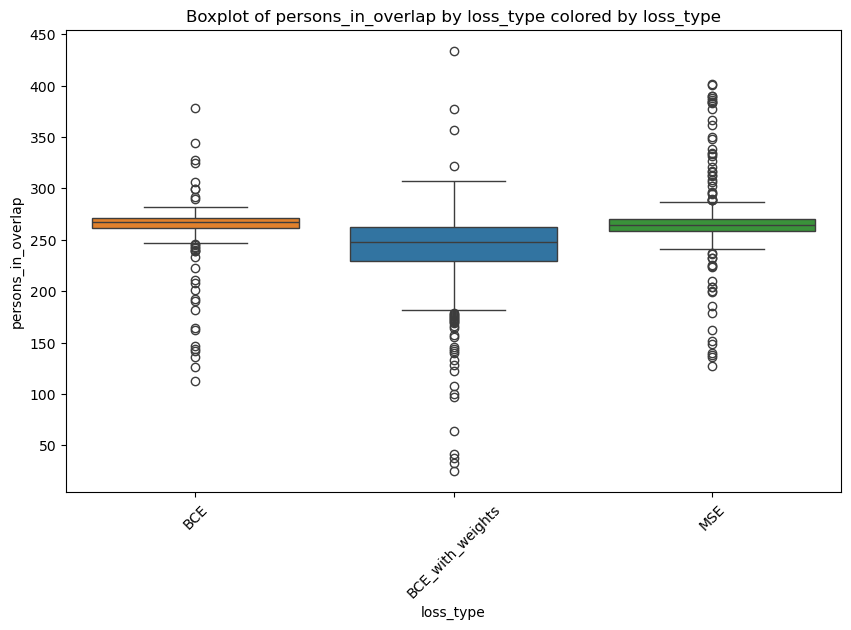

In [76]:
df1 = df.loc[df['loss_type']!='', :]
boxplots(df1, 'loss_type', 'persons_in_overlap')

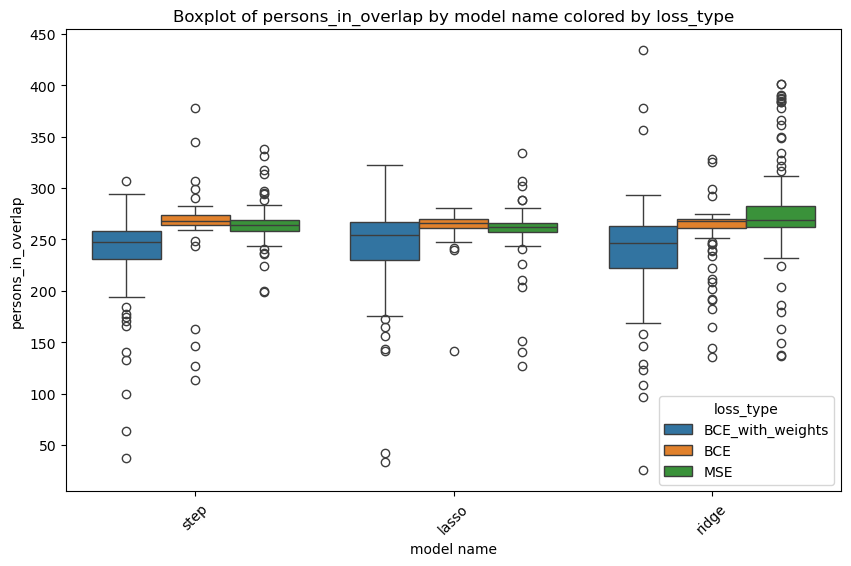

In [77]:
df1 = df.loc[df['loss_type']!='', :]
boxplots(df1, 'model name', 'persons_in_overlap', 'loss_type')

In [78]:
df['loss_type'].unique()

array(['', 'BCE_with_weights', 'BCE', 'MSE'], dtype=object)

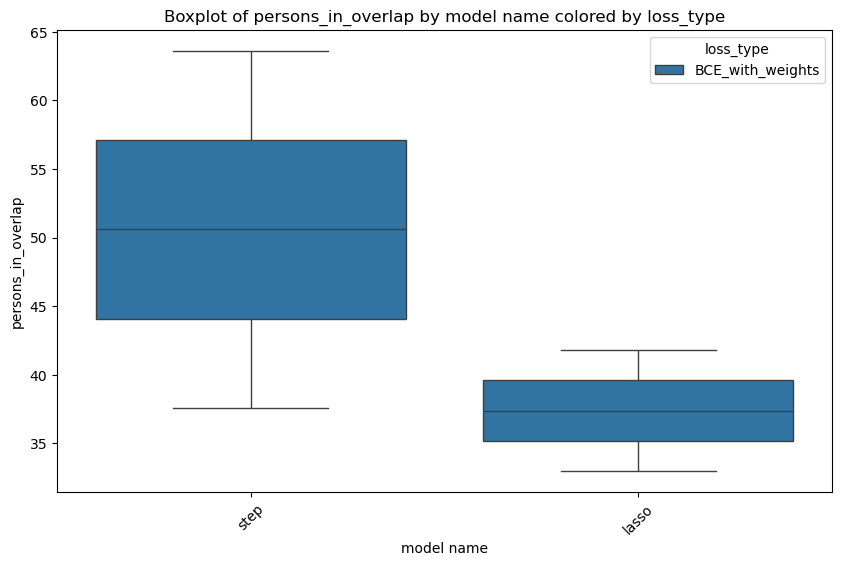

In [79]:
df1 = df.loc[df['loss_type']!='', :]
df1 = df1.loc[df['model name']!='ridge', :]
df1 = df1.loc[df['persons_in_overlap']<100, :]
boxplots(df1, 'model name', 'persons_in_overlap', 'loss_type')

#### optimizer

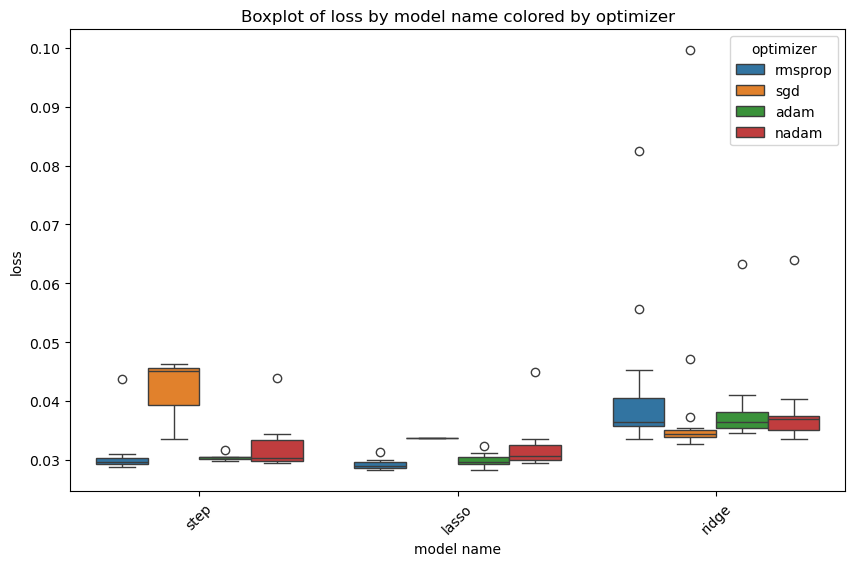

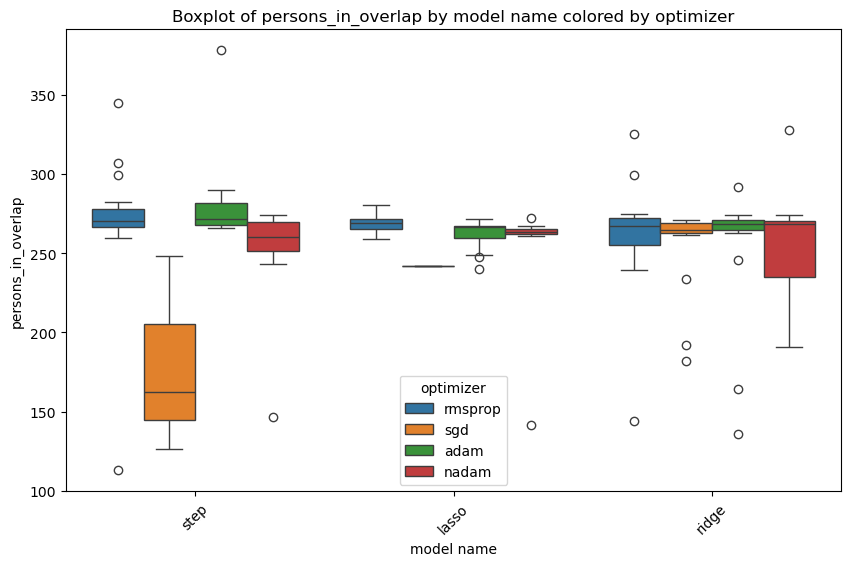

In [80]:
df1 = df.loc[df['loss_type']=='BCE', :]
boxplots(df1, 'model name', col_continious_list, 'optimizer')

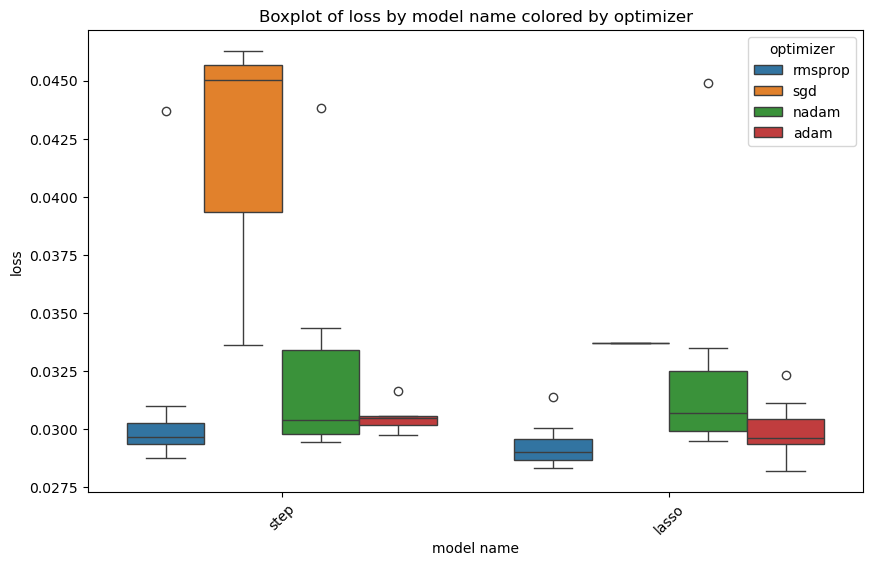

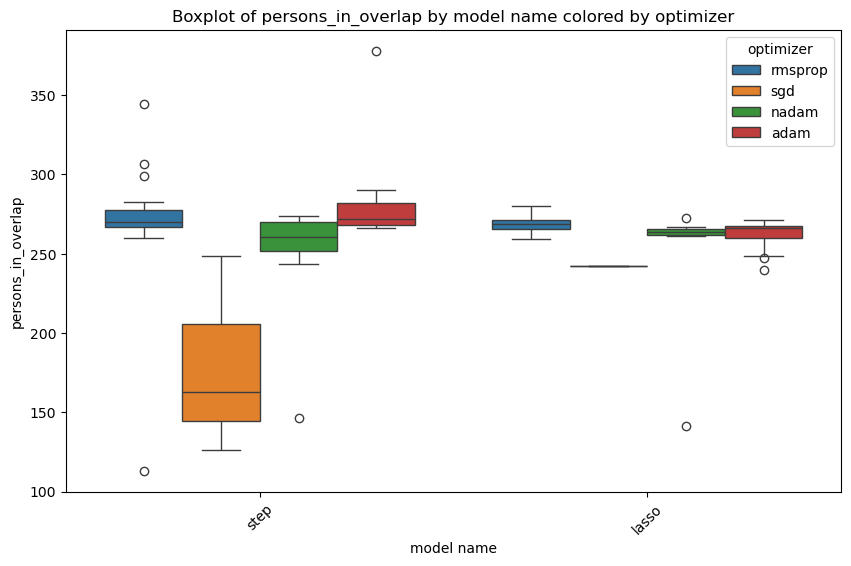

In [81]:
df1 = df.loc[df['loss_type']=='BCE', :]
df1 = df1.loc[df['model name']!='ridge']
boxplots(df1, 'model name', col_continious_list, 'optimizer')

#### activation

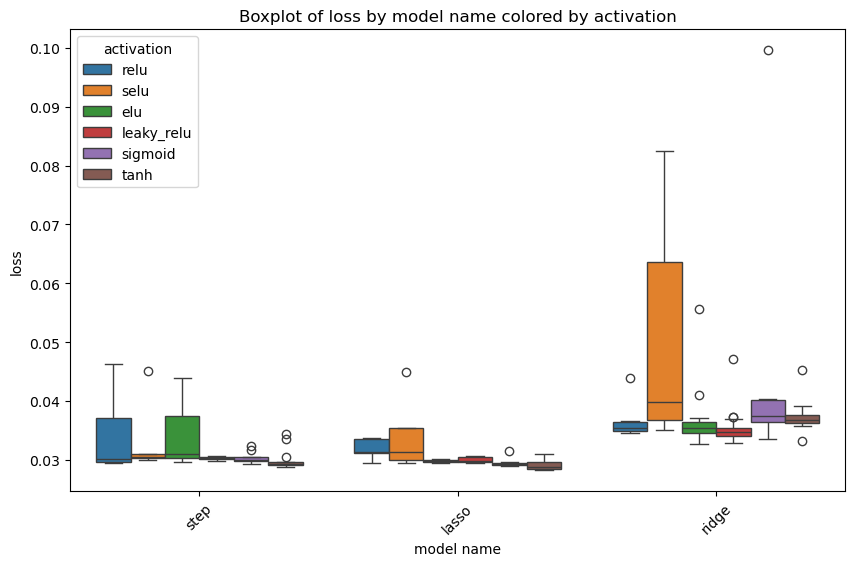

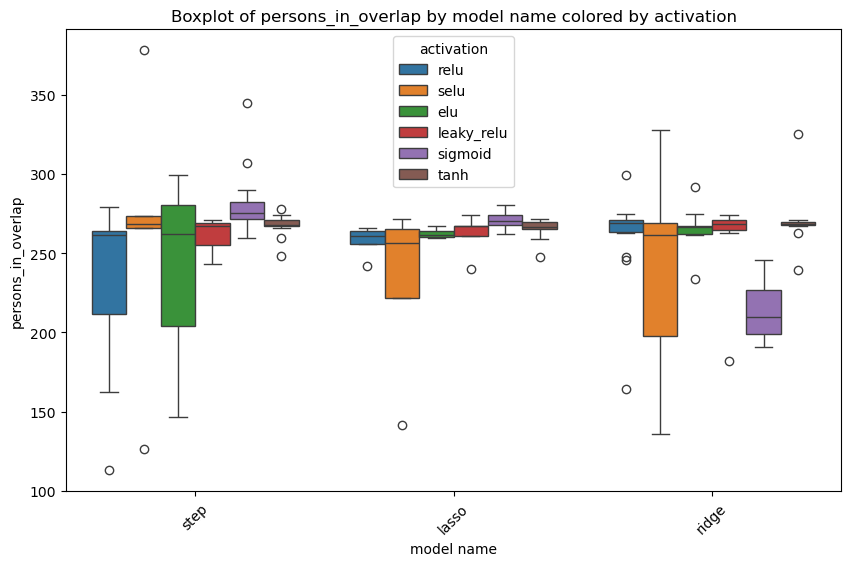

In [82]:
df1 = df.loc[df['loss_type']=='BCE', :]
boxplots(df1, 'model name', col_continious_list, 'activation')

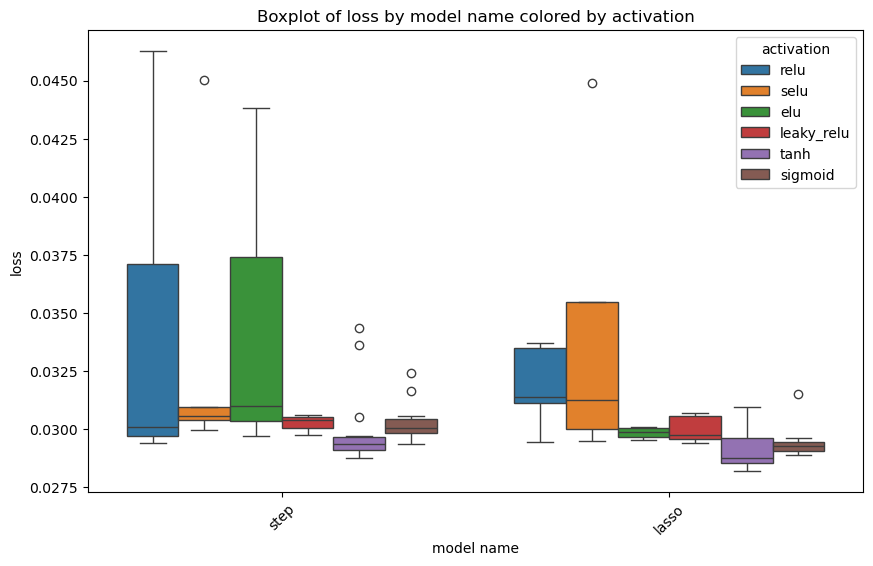

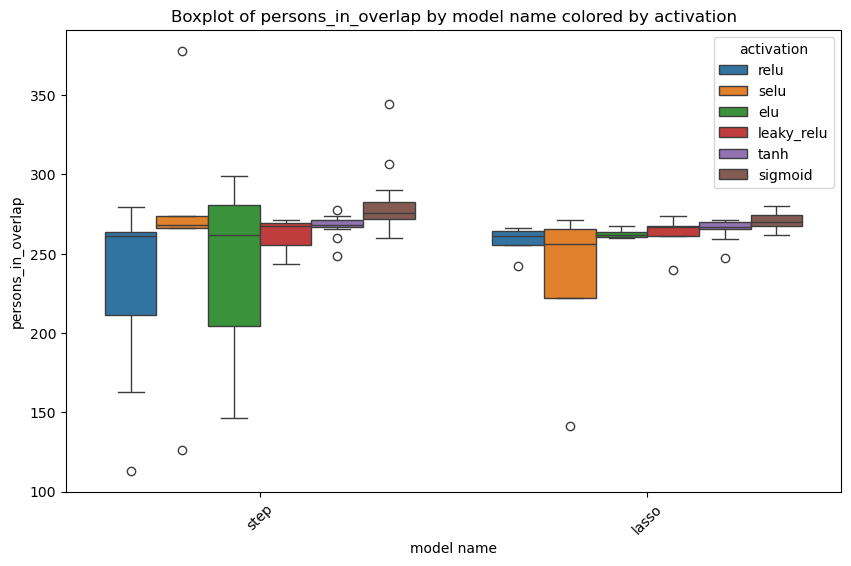

In [83]:
df1 = df.loc[df['loss_type']=='BCE', :]
df1 = df1.loc[df['model name']!='ridge', :]
boxplots(df1, 'model name', col_continious_list, 'activation')